In [1]:
# Vehicle_Dectection_NN_Training

In [2]:
from myLib.vehicle_detector import *
%matplotlib inline

/home/tiff/.conda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
my_features1 = lect_features = create_feature_parameters \
(
    color_space    = 'RGB', # # RGB HSV LUV HLS YUV YCrCb
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL' , #0, #'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [4]:
my_features2 = lect_features = create_feature_parameters \
(
    color_space    = 'HSV', # # RGB HSV LUV LUV YUV YCrCb
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL' , #0, #'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [5]:
my_features3 = lect_features = create_feature_parameters \
(
    color_space    = 'LUV', # # RGB HSV LUV HLS YUV YCrCb
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL' , #0, #'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [6]:
my_features4 = lect_features = create_feature_parameters \
(
    color_space    = 'HLS', # # RGB HSV LUV HLS YUV YCrCb
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL' , #0, #'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [7]:
my_features5 = lect_features = create_feature_parameters \
(
    color_space    = 'YUV', # # RGB HSV LUV HLS YUV YCrCb
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL' , #0, #'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [8]:
my_features6 = lect_features = create_feature_parameters \
(
    color_space    = 'YCrCb', # # RGB HSV LUV HLS YUV YCrCb
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL' , #0, #'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [31]:
def create_feature_list (f1, f2, f3, f4, f5, f6):
    list = []
    list.append (f1)
    list.append (f2)
    #list.append (f3)
    list.append (f4)
    list.append (f5)
    list.append (f6)

    return list

In [32]:
datalist = create_feature_list (my_features1, my_features2, my_features3, my_features4, my_features5, my_features6)

In [17]:
#test_images='TestImages/*.jpeg'
test_images='TestSmall/*/*/*.jpeg'
test_images='../TrainingImageSmall/*/*/*.jpeg'
#test_images='TestLarge/*/*/*.png'
cars, notcars, len_cars, len_noncars =  build_test_data (test_images)

print (len_cars, len_noncars)


1196 1125


In [18]:
# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 1125 # 500
cars        = cars   [0:sample_size]
notcars     = notcars[0:sample_size]

In [19]:
## Only need to modify the following

In [26]:
import pickle
def automate_training (cars, notcars, my_features):
    car_features    = extract_features_param (cars   , my_features)
    notcar_features = extract_features_param (notcars, my_features)
    
    X_train, X_test, y_train, y_test, X_scaler = create_test_training_data (car_features, notcar_features)
    svc = train_model (X_train, X_test, y_train, y_test) ## shuffle data in train_model()
    
    color_space    = my_features['color_space']
    orient         = my_features['orient']
    pix_per_cell   = my_features['pix_per_cell']
    cell_per_block = my_features['cell_per_block']
    hog_channel    = my_features['hog_channel']
    spatial_size   = my_features['spatial_size']
    hist_bins      = my_features['hist_bins']
    
    spatial_feat   = my_features['spatial_feat']
    hist_feat      = my_features['hist_feat']
    hog_feat       = my_features['hog_feat']
    
    pFile = model_name = "model"+color_space+ ".pk"
    print (model_name)

    data={
        'svc'           : svc,
        'X_scaler'      : X_scaler,
        'color_space'   : color_space,
        'orient'        : orient,
        'pix_per_cell'  : pix_per_cell,
        'cell_per_block': cell_per_block,
        'spatial_size'  : spatial_size,
        'hist_bins'     : hist_bins,
        'hog_channel'   : hog_channel
         }

    with open(pFile, 'wb') as pFile:
        pickle.dump(data, pFile) 
    return  X_train, X_test, y_train, y_test, model_name  
        
def automate_testing (image, ystart, ystop, scale, my_features, model_name, X_train, X_test, y_train, y_test ):
    pfile = model_name
    dist_pickle    = pickle.load( open(pfile, "rb" ) )
    svc            = dist_pickle["svc"]
    X_scaler       = dist_pickle["X_scaler"]
    
    color_space    = dist_pickle["color_space"]
    orient         = dist_pickle["orient"]
    pix_per_cell   = dist_pickle["pix_per_cell"]
    cell_per_block = dist_pickle["cell_per_block"]
    spatial_size   = dist_pickle["spatial_size"]
    hist_bins      = dist_pickle["hist_bins"]
    hog_channel    = dist_pickle["hog_channel"]
    
    print('Using:',orient,'orientations',pix_per_cell,
        'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

    test_model_prediction (svc, X_test, y_test, n_predict = 10 )
 


    # note color space will be RGB2YCrCb and all for hog_channel
    # no nog_channel
    # no color_space
    
    out_img, window_list= find_cars(image, \
                ystart, ystop, scale, \
                svc, X_scaler, \
                color_space, orient, pix_per_cell, cell_per_block,  spatial_size, hist_bins, hog_channel)
    return out_img, window_list
    
    

In [28]:
from time import sleep, perf_counter as pc
for i in range (0, len(datalist)):
    print (i)
    t=time.time()
    my_features  = datalist[i]
    X_train, X_test, y_train, y_test, model_name = automate_training (cars, notcars, my_features)
    t2 = time.time()    
    print(round(t2-t, 2), 'Seconds to train SVC...')


0


/home/tiff/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


2.02 Seconds to train SVC...
modelRGB.pk
54.76 Seconds to train SVC...
1
1.2 Seconds to train SVC...
modelHSV.pk
54.86 Seconds to train SVC...
2
1.29 Seconds to train SVC...
modelLUV.pk
54.3 Seconds to train SVC...
3
1.19 Seconds to train SVC...
modelHLS.pk
54.25 Seconds to train SVC...
4
1.15 Seconds to train SVC...
modelYUV.pk
53.4 Seconds to train SVC...
5
1.18 Seconds to train SVC...
modelYCrCb.pk
53.1 Seconds to train SVC...


0
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
Test Accuracy of SVC =  0.9711
My SVC predicts    :  [ 0.  1.  1.  1.  1.  1.  0.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  1.  1.  1.  1.  0.  0.  1.  1.]
0.00649 Seconds to predict 10 labels with SVC


/home/tiff/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Testing time 1.52
1
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
Test Accuracy of SVC =  0.7733
My SVC predicts    :  [ 0.  1.  1.  0.  1.  1.  0.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  1.  1.  1.  1.  0.  0.  1.  1.]
0.00576 Seconds to predict 10 labels with SVC
Testing time 1.31
2
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
Test Accuracy of SVC =  0.8644
My SVC predicts    :  [ 0.  1.  1.  1.  1.  1.  0.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  1.  1.  1.  1.  0.  0.  1.  1.]
0.00582 Seconds to predict 10 labels with SVC
Testing time 1.33
3
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
Test Accuracy of SVC =  0.9978
My SVC predicts    :  [ 0.  1.  1.  1.  1.  1.  0.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  1.  1.  1.  1.  0.  0.  1.  1.]
0.00678 Seconds to predict 10 labels with SVC
Testing time 1.35
4
Using: 9 orientations 8 pixels per 

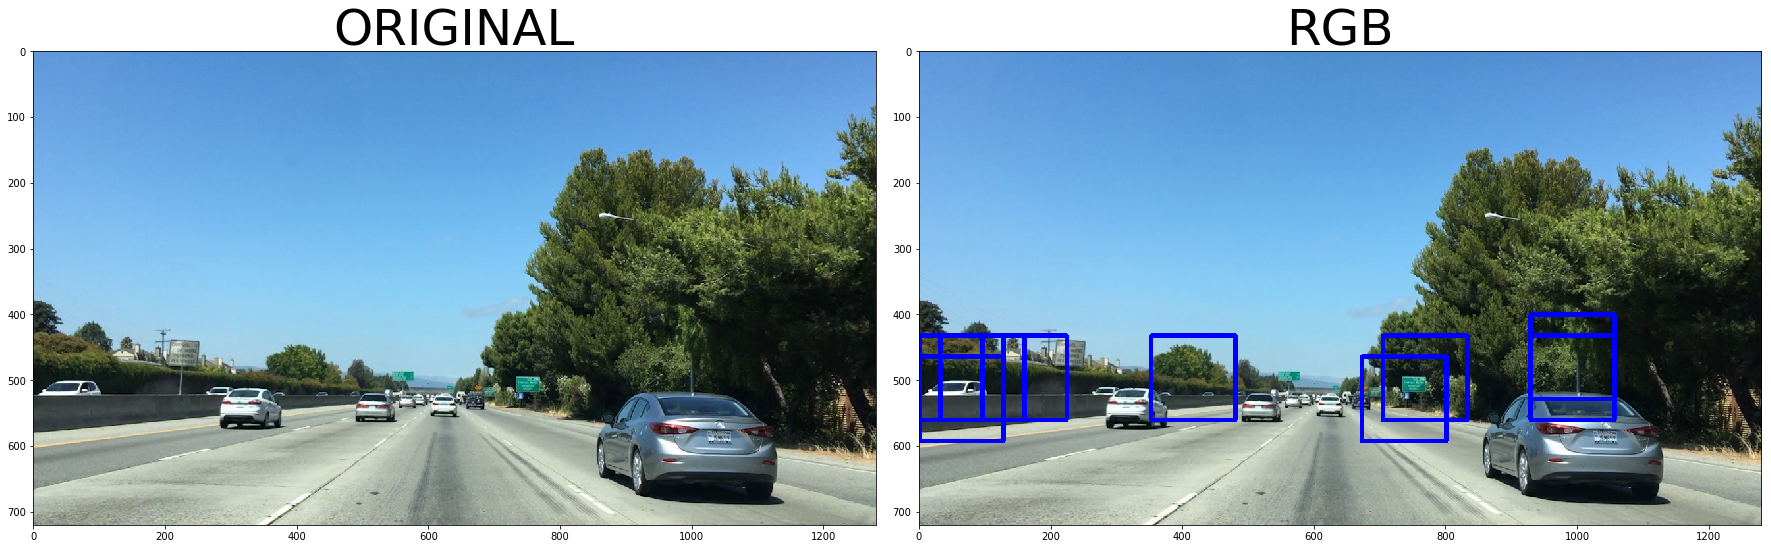

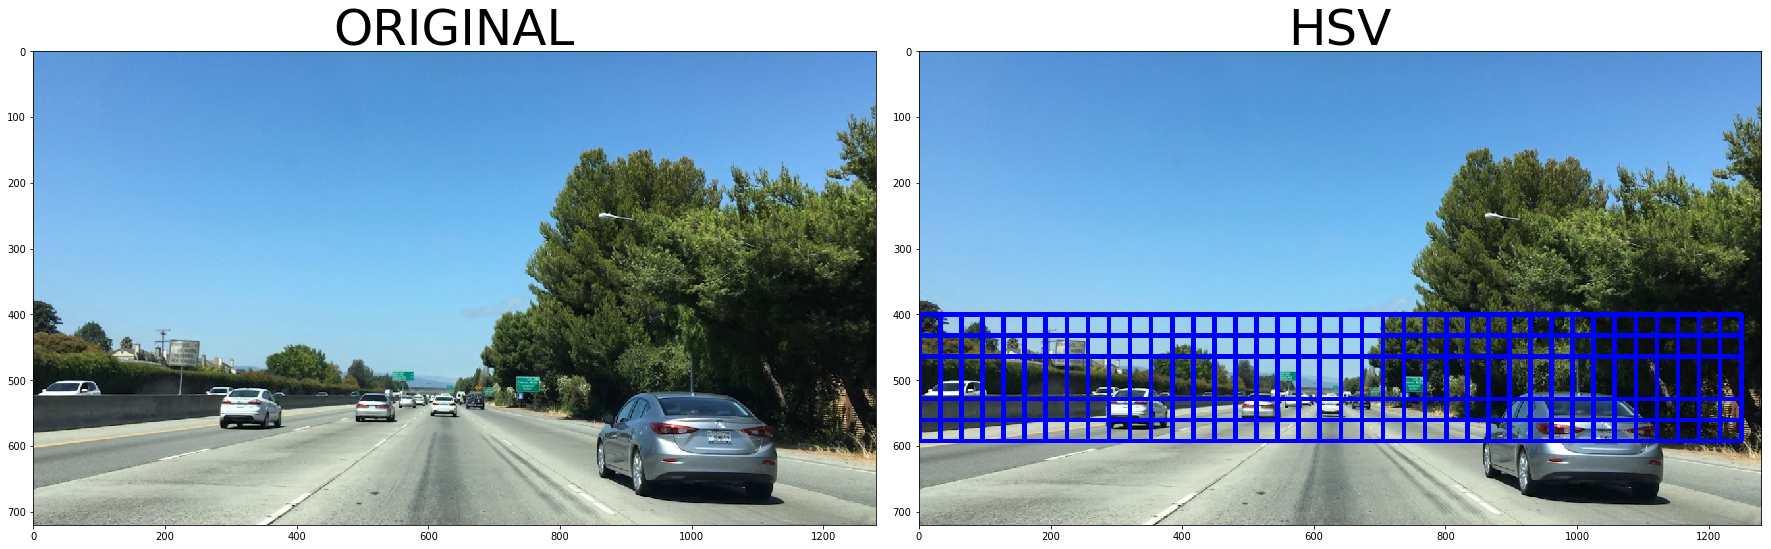

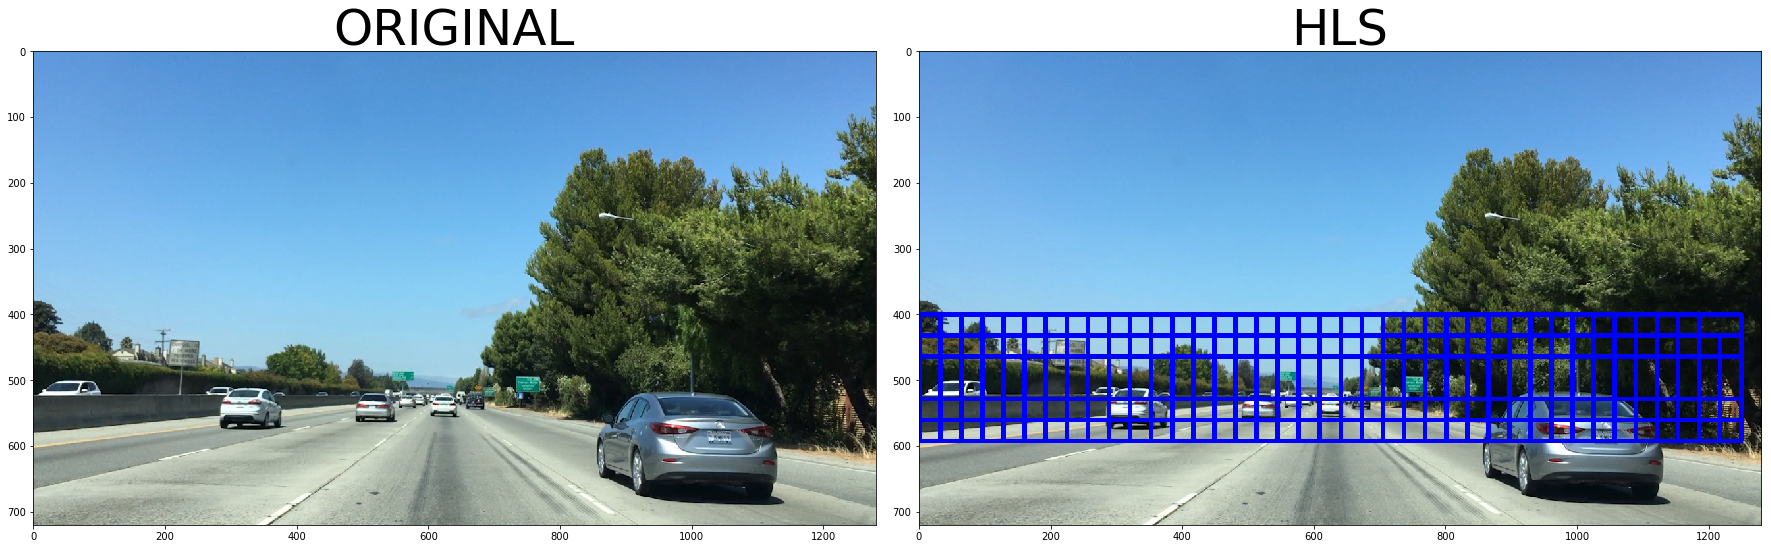

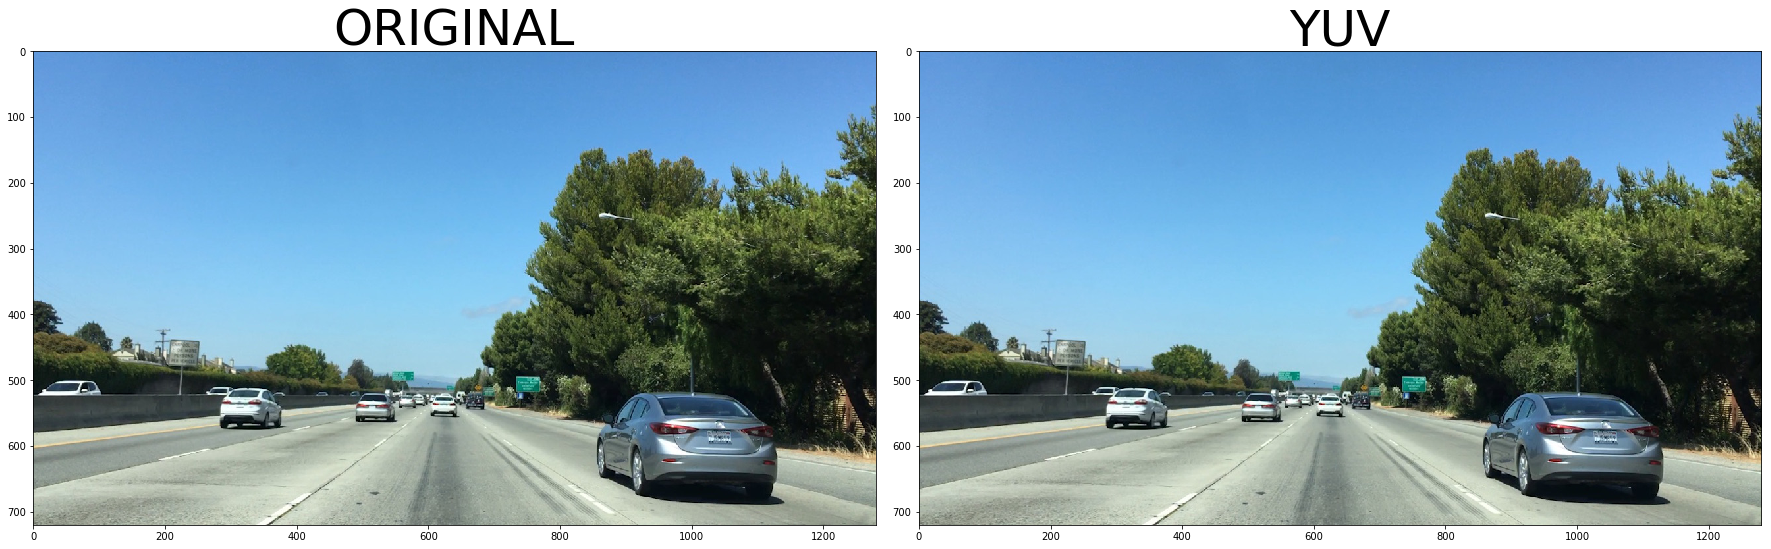

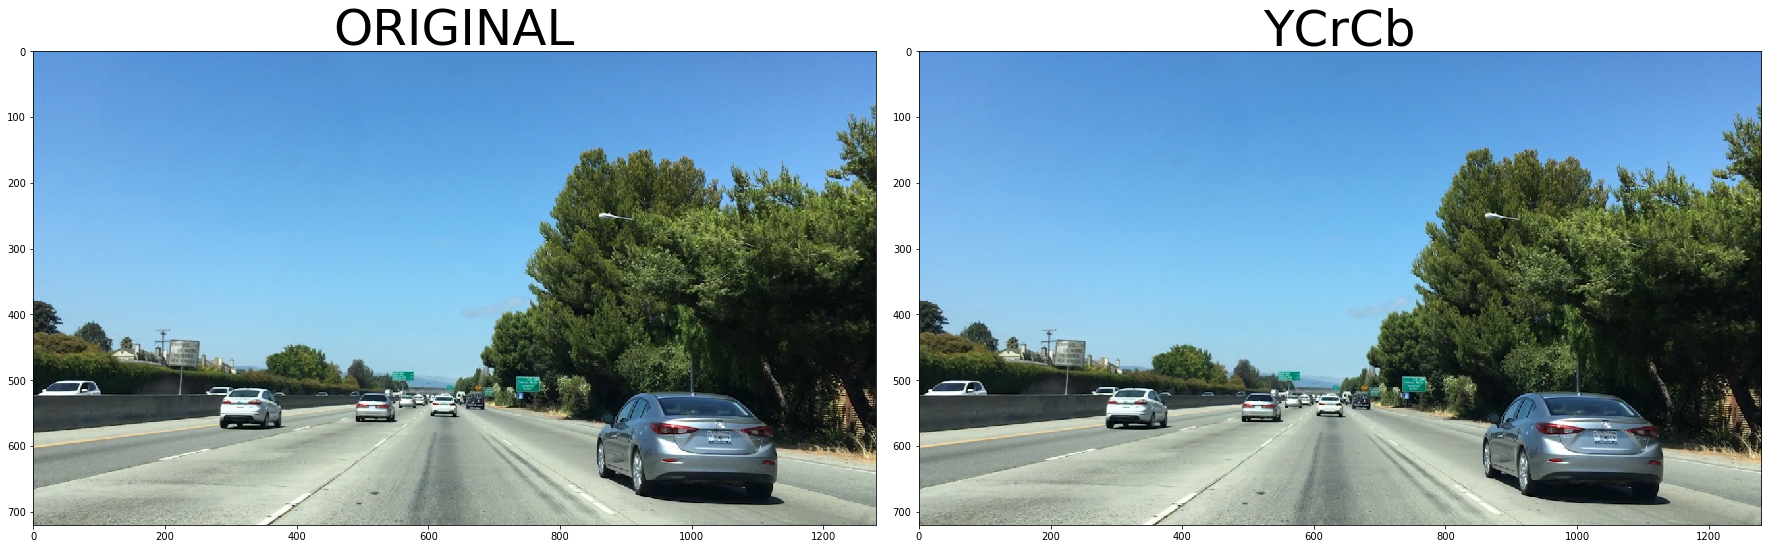

In [34]:
for i in range (0, len(datalist)):
    print (i)    
    ystart = 400
    ystop  = 650
    scale  = 2 # 1.5 # 1.8 #4.0 #1.0  #6.0 #9.0  #3.0 
    
    t0 = pc()
    image = mpimg.imread('test_images/bbox-example-image.jpg')
    my_features  = datalist[i]
    color_space = my_features ['color_space']
    model_name = "model"+color_space+ ".pk"
    out_img, window_list = automate_testing (image, ystart, ystop, scale, my_features, model_name, X_train, X_test, y_train, y_test )
    plot_2_images(image, out_img, "ORIGINAL", my_features['color_space'])
    total_time = (pc()-t0)
    print("Testing time" , round(total_time, 2))

In [14]:
y_start_stop = [None, None] # Min and max in y to search in slide_window()
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

In [15]:
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat) 

/home/tiff/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [16]:
window_img = draw_boxes(image, hot_windows, color=(0, 0, 255), thick=6)

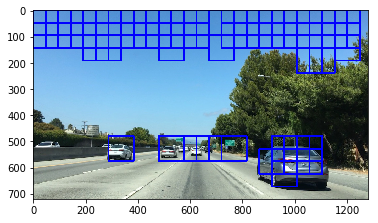

In [17]:
plt.imshow(window_img)

In [26]:
### STOP HERE : BOTTOM is reload pickle file

In [17]:

#pfile = "model-params-hls.pk"   
pfile = "model-params-hsv2.pk" 
#pfile = "model-params.pk"       
#pfile = "model-params-yuv.pk"
#pfile = "model-params-hsv2.pk" 
#pfile = "model-params-luv.pk"  
#pfile = "model-params-ycrcb.pk"



dist_pickle    = pickle.load( open(pfile, "rb" ) )
svc            = dist_pickle["svc"]
X_scaler       = dist_pickle["X_scaler"]
color_space    = dist_pickle["color_space"]
orient         = dist_pickle["orient"]
pix_per_cell   = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size   = dist_pickle["spatial_size"]
hist_bins      = dist_pickle["hist_bins"]
hog_channel    = dist_pickle["hog_channel"]

/home/tiff/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


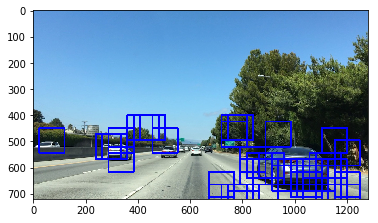

In [18]:
ystart = 400
ystop = 656
scale = 1.5
image = mpimg.imread('bbox-example-image.jpg')
out_img2, window_list= find_cars(image, ystart, ystop, \
            scale, svc, X_scaler, \
            orient, pix_per_cell, cell_per_block,  spatial_size, hist_bins)
            #color_space, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins)
plt.imshow(out_img2)

In [ ]:
# not working well at all
my_features = other_features = create_feature_parameters \
(
    color_space    = 'YCrCb', # # RGB HSV LUV HLS YUV YCrCb
    spatial_size   = (32, 32),
    hist_bins      = 32,
    orient         = 8, 
    pix_per_cell   = 8, 
    cell_per_block = 8, 
    hog_channel    = 3, # 'ALL', # valid hog_channel (0,1,2)
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [ ]:
my_features = create_feature_parameters \
(
    color_space    = 'HSV' , 
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)